# Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews <br>

EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 
[Ans] We could use Score/Rating. A rating of 4 or 5 can be cosnidered as a positive review. A rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered nuetral and such reviews are ignored from our analysis. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.




# [1]. Reading Data

## [1.1] Loading the data

The dataset is available in two forms
1. .csv file
2. SQLite Database

In order to load the data, We have used the SQLITE dataset as it is easier to query the data and visualise the data efficiently.
<br> 

Here as we only want to get the global sentiment of the recommendations (positive or negative), we will purposefully ignore all Scores equal to 3. If the score is above 3, then the recommendation wil be set to "positive". Otherwise, it will be set to "negative".

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

# [5] Assignment 7: SVM

<ol>
    <li><strong>Apply SVM on these feature sets</strong>
        <ul>
            <li><font color='red'>SET 1:</font>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
        </ul>
    </li>
    <br>
    <li><strong>Procedure</strong>
        <ul>
    <li>You need to work with 2 versions of SVM
        <ul><li>Linear kernel</li>
            <li>RBF kernel</li></ul>
    <li>When you are working with linear kernel, use SGDClassifier’ with hinge loss because it is computationally less expensive.</li>
    <li>When you are working with ‘SGDClassifier’ with hinge loss and trying to find the AUC
        score, you would have to use <a href='https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html'>CalibratedClassifierCV</a></li>
    <li>Similarly, like kdtree of knn, when you are working with RBF kernel it's better to reduce
the number of dimensions. You can put min_df = 10, max_features = 500 and consider a sample size of 40k points.</li>                
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>When you are working on the linear kernel with BOW or TFIDF please print the top 10 best
features for each of the positive and negative classes.</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature engineering</strong>
        <ul>
    <li>To increase the performance of your model, you can also experiment with with feature engineering like :</li>
            <ul>
            <li>Taking length of reviews as another feature.</li>
            <li>Considering some features from review summary as well.</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

#### Reading the csv file (Which is already saved on my system (saved while doing naive bayes assignment))


In [2]:
review_dataset_filtered = pd.read_csv('filtered_reviews_data.csv')

In [3]:
review_dataset_filtered.shape

(364173, 12)

In [4]:
#removing all the null value represnted rows (removing rows even if one column has na in entire 12 columns in given dataset)
review_dataset_filtered.dropna(inplace=True)

In [5]:
review_dataset_filtered.shape

(364158, 12)

#### As it is temporal data, I will be performing time-based splitting

In [6]:
#sorting the dataset according to time as we need time-based splitting
review_dataset_final_sorted = review_dataset_filtered.sort_values(by ='Time',axis=0,ascending=True,inplace=False,kind='quicksort')

In [7]:
review_dataset_final_sorted.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_text
117926,150523,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
117903,150500,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,positive,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
298794,451855,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,positive,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
169283,230284,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,positive,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...
298793,451854,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,positive,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...


In [8]:
labels = review_dataset_final_sorted['Score']

In [9]:
LABELS = labels.value_counts()

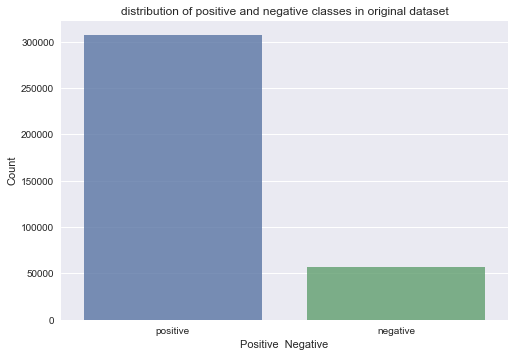

In [10]:
sns.barplot(LABELS.index,LABELS.values,alpha=0.8)
plt.title("distribution of positive and negative classes in original dataset")
plt.xlabel("Positive  Negative")
plt.ylabel("Count")
plt.show()

In [11]:
print(f"POSITIVE class labels in original data is {round(((labels.value_counts()[0]/review_dataset_final_sorted.shape[0])*100),2)} %")
print(f"NEGATIVE class labels in original data is {round(((labels.value_counts()[1]/review_dataset_final_sorted.shape[0])*100),2)} %")

POSITIVE class labels in original data is 84.32 %
NEGATIVE class labels in original data is 15.68 %


In [12]:
#Now, let's take only 50k datapoints for computation because 300K+ would not be ideal to choose among
# WE ARE CHOOSING ONLY 50K because (if we consider more than them , then we might face computational issues)
review_dataset_final_sorted_sample = review_dataset_final_sorted.sample(n=50000)

In [13]:
#Now, let's make a check distribution of data or percentage of data present
sample_labels = review_dataset_final_sorted_sample['Score'] 

In [14]:
sample_labels.value_counts()

positive    42115
negative     7885
Name: Score, dtype: int64

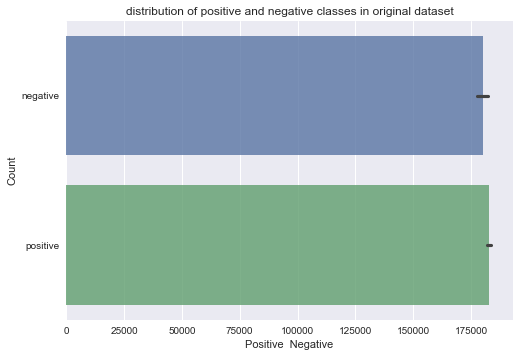

In [15]:
sns.barplot(sample_labels.index,sample_labels.values,alpha=0.8)
plt.title("distribution of positive and negative classes in original dataset")
plt.xlabel("Positive  Negative")
plt.ylabel("Count")
plt.show()

In [16]:
print(f"POSITIVE class labels in sample data is {round(((sample_labels.value_counts()[0]/review_dataset_final_sorted_sample.shape[0])*100),2)} %")
print(f"NEGATIVE class labels in sample data is {round(((sample_labels.value_counts()[1]/review_dataset_final_sorted_sample.shape[0])*100),2)} %")

POSITIVE class labels in sample data is 84.23 %
NEGATIVE class labels in sample data is 15.77 %


So, it is almost same as our original dataset. Now, we can proceed on with further operations

#### Actually it is reviews dataset. So,I think it is better if we perform time-based splitting rather than random split
So, we will sort it first and then divide the data in 80:20 ratio and from train we can divide cross validation data

In [17]:
#sorting the dataset according to time as we need time-based splitting
final_data = review_dataset_final_sorted_sample.sort_values(by ='Time',axis=0,ascending=True,inplace=False,kind='quicksort')

In [18]:
final_data.shape

(50000, 12)

So, 40000 will be train data and 10000 will be test data

In [19]:
train_data = final_data['Cleaned_text'][:32000]
test_data = final_data['Cleaned_text'][32000:]
train_data_labels = final_data['Score'][:32000]
test_data_labels = final_data['Score'][32000:]

In [20]:
test_data_labels.value_counts()

positive    14838
negative     3162
Name: Score, dtype: int64

In [21]:
#TRAIN DATA
print(f"positive labels distribution for TRAIN data {round((train_data_labels.value_counts()[0]/train_data_labels.shape[0])*100,2)}")
print(f"negative labels distribution for TRAIN data {round((train_data_labels.value_counts()[1]/train_data_labels.shape[0])*100,2)}")

positive labels distribution for TRAIN data 85.24
negative labels distribution for TRAIN data 14.76


In [22]:
#TEST DATA
print(f"positive labels distribution for TEST data {round((test_data_labels.value_counts()[0]/test_data_labels.shape[0])*100,2)}")
print(f"negative labels distribution for TEST data {round((test_data_labels.value_counts()[1]/test_data_labels.shape[0])*100,2)}")

positive labels distribution for TEST data 82.43
negative labels distribution for TEST data 17.57


So, as we can see that there is slight variation in both distributions but it is fine to some extent

# Applying SVM

## [5.1] Linear SVM

In [23]:
#importing all the necessary packages needed for Logistic regression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

### [5.1.1] Applying Linear SVM on BOW,<font color='red'> SET 1</font>

In [24]:
#Initially applying BOW on train data and then will apply BOW on test data
#BoW on train data
count_vect = CountVectorizer(min_df=50) #selecting terms which has frequency higher than 50
bow_train_data = count_vect.fit_transform(train_data)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)
print("the type of count vectorizer ",type(bow_train_data))
print("the shape of out text BOW vectorizer ",bow_train_data.get_shape())
print("the number of unique words ", bow_train_data.get_shape()[1])

some feature names  ['abl', 'absolut', 'absorb', 'accept', 'access', 'accord', 'acid', 'acquir', 'across', 'act']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (32000, 2123)
the number of unique words  2123


In [25]:
tuned_parameters = [{'alpha': [10**-4, 10**-2, 10**0, 10**2, 10**4]}] 

#using GridSearchCV
model = GridSearchCV(SGDClassifier(loss="hinge"),tuned_parameters,scoring='roc_auc',cv=3)
model.fit(bow_train_data,train_data_labels.values)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.0001, 0.01, 1, 100, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [26]:
model.best_estimator_

SGDClassifier(alpha=0.01, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
linear_svm_model = SGDClassifier(alpha=0.01, loss='hinge')

In [28]:
calibrated_model = CalibratedClassifierCV(base_estimator=linear_svm_model, cv=3)
calibrated_model.fit(bow_train_data,train_data_labels)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.01, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
            cv=3, method='sigmoid')

In [29]:
#https://stackoverflow.com/questions/38692520/what-is-the-difference-between-fit-transform-and-transform-in-sklearn-countvecto
bow_test_data = count_vect.transform(test_data)

In [30]:
probabilities = calibrated_model.predict_proba(bow_test_data)
probabilitiess = probabilities[:,1]

In [31]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(test_data_labels,probabilitiess))

0.91113716095


In [32]:
predictions = calibrated_model.predict(bow_test_data)
prediction_probability_test = calibrated_model.predict_proba(bow_test_data)
prediction_probability_train = calibrated_model.predict_proba(bow_train_data)

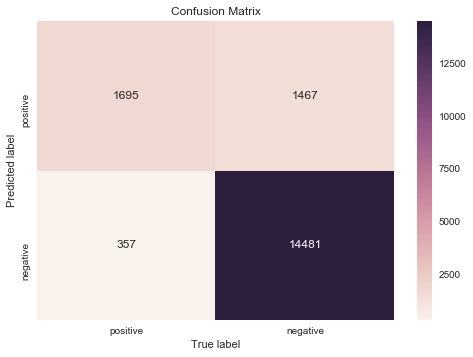

In [33]:
# Code for drawing seaborn heatmaps
class_names = ['positive','negative']
heatmap_dataframe = pd.DataFrame(confusion_matrix(test_data_labels.values, predictions), index=class_names, columns=class_names )
heatmap = sns.heatmap(heatmap_dataframe, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()

The AUC value for test data is 0.9111371609503234


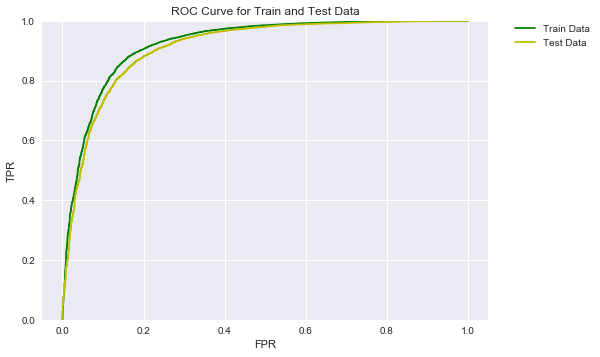

In [34]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
#https://medium.com/greyatom/lets-learn-about-auc-roc-curve-4a94b4d88152
#AUC and ROC Values

fpr_train, tpr_train, threshold_train = roc_curve(train_data_labels, prediction_probability_train [:,1],pos_label='positive')
fpr_test, tpr_test, threshold_test = roc_curve(test_data_labels, prediction_probability_test[:,1],pos_label='positive')
print(f"The AUC value for test data is {roc_auc_score(test_data_labels, prediction_probability_test[:,1])}")

plt.plot(fpr_train, tpr_train,'g', label = 'Train Data')
plt.plot(fpr_test, tpr_test,'y', label = 'Test Data')
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.title("ROC Curve for Train and Test Data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### [5.1.2] Applying Linear SVM on TFIDF,<font color='red'> SET 2</font>

In [35]:
tf_idf_vectorizer = TfidfVectorizer(ngram_range=(1,2),min_df=50)
tf_idf_train_data = tf_idf_vectorizer.fit_transform(train_data)
print("some sample features(unique words in the corpus)",tf_idf_vectorizer.get_feature_names()[0:10])
print('='*50)
print("the type of count vectorizer ",type(tf_idf_train_data))
print("the shape of out text TFIDF vectorizer ",tf_idf_train_data.get_shape())
print("the number of unique words including both unigrams and bigrams ", tf_idf_train_data.get_shape()[1])

some sample features(unique words in the corpus) ['abl', 'abl buy', 'abl find', 'abl get', 'absolut', 'absolut best', 'absolut delici', 'absolut love', 'absorb', 'accept']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (32000, 3366)
the number of unique words including both unigrams and bigrams  3366


In [36]:
tf_idf_test_data = tf_idf_vectorizer.transform(test_data)

In [37]:
tuned_parameters = [{'alpha': [10**-4, 10**-2, 10**0, 10**2, 10**4]}] 

#using GridSearchCV
model = GridSearchCV(SGDClassifier(loss="hinge"),tuned_parameters,scoring='roc_auc',cv=3)
model.fit(tf_idf_train_data,train_data_labels.values)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.0001, 0.01, 1, 100, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [38]:
model.best_estimator_

SGDClassifier(alpha=0.01, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
linear_svm_model = SGDClassifier(alpha=0.01, loss='hinge')

In [40]:
calibrated_model = CalibratedClassifierCV(base_estimator=linear_svm_model, cv=3)
calibrated_model.fit(tf_idf_train_data,train_data_labels)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.01, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
            cv=3, method='sigmoid')

In [41]:
probabilities = calibrated_model.predict_proba(tf_idf_test_data)
probabilitiess = probabilities[:,1]

In [42]:
predictions = calibrated_model.predict(tf_idf_test_data)
prediction_probability_test = calibrated_model.predict_proba(tf_idf_test_data)
prediction_probability_train = calibrated_model.predict_proba(tf_idf_train_data)

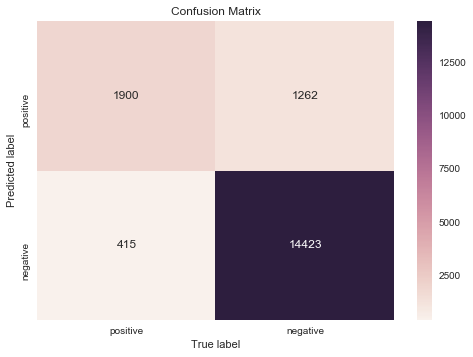

In [43]:
# Code for drawing seaborn heatmaps
class_names = ['positive','negative']
heatmap_dataframe = pd.DataFrame(confusion_matrix(test_data_labels.values, predictions), index=class_names, columns=class_names )
heatmap = sns.heatmap(heatmap_dataframe, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()

The AUC value for test data is 0.9375607392646826


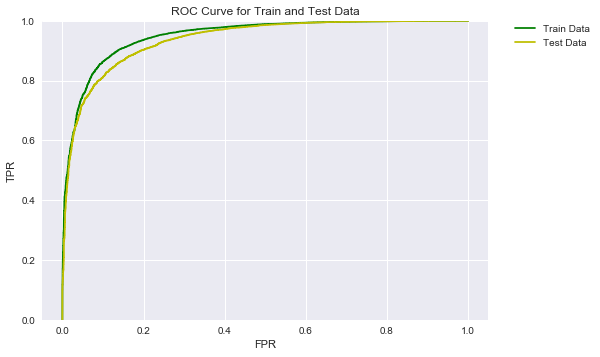

In [44]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
#https://medium.com/greyatom/lets-learn-about-auc-roc-curve-4a94b4d88152
#AUC and ROC Values

fpr_train, tpr_train, threshold_train = roc_curve(train_data_labels, prediction_probability_train [:,1],pos_label='positive')
fpr_test, tpr_test, threshold_test = roc_curve(test_data_labels, prediction_probability_test[:,1],pos_label='positive')
print(f"The AUC value for test data is {roc_auc_score(test_data_labels, prediction_probability_test[:,1])}")

plt.plot(fpr_train, tpr_train,'g', label = 'Train Data')
plt.plot(fpr_test, tpr_test,'y', label = 'Test Data')
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.title("ROC Curve for Train and Test Data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

#### Top 10 important features of positive class

In [45]:
model = SGDClassifier(alpha=0.01, loss='hinge')
model.fit(tf_idf_train_data,train_data_labels.values)
weight_vec = model.coef_
print(np.count_nonzero(weight_vec))

3366


In [46]:
imp_feat_df = pd.DataFrame(weight_vec.T,columns=['positive'])
imp_feat_df['feature'] = tf_idf_vectorizer.get_feature_names()
top_features = imp_feat_df.sort_values(by='positive',kind='quicksort',ascending=False) # ascending=False because we want to arrange in descending order
print(f"Top 10 important features of positive reviews are : {np.array(top_features['feature'][:10])}")

Top 10 important features of positive reviews are : ['great' 'best' 'love' 'delici' 'good' 'excel' 'perfect' 'nice' 'favorit'
 'wonder']


#### Top 10 important features of negative class

In [47]:
print(f"Top 10 important features of negative reviews are : {np.array(top_features['feature'].tail(10))}") #tail becuase we know last values will be negative when top of them are positive

Top 10 important features of negative reviews are : ['stale' 'threw' 'terribl' 'horribl' 'wast' 'wast money' 'worst' 'aw'
 'return' 'disappoint']


### [5.1.3]  Applying Linear SVM on AVG W2V,<font color='red'> SET 3</font>

In [48]:
# Train your own Word2Vec model using your own text corpus with train_data
list_of_sentences_train=[]
for sentance in train_data:
    list_of_sentences_train.append(sentance.split())

In [49]:
#training W2V using test data
list_of_sentences_test=[]
for sentance in test_data:
    list_of_sentences_test.append(sentance.split())

In [50]:
# Train your own Word2Vec model using your own text corpus with train_data with min_count = 5
w2v_model=Word2Vec(list_of_sentences_train,min_count=5,size=50, workers=4)

w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))

number of words that occured minimum 5 times  7695


In [51]:
#computing avgW2V for train data (for each review)
train_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentences_train): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    train_vectors.append(sent_vec)


100%|███████████████████████████████████████████████████████████████████████████| 32000/32000 [01:24<00:00, 378.84it/s]


In [52]:
#computing avgW2V for train data (for each review)
test_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentences_test): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    test_vectors.append(sent_vec)


100%|███████████████████████████████████████████████████████████████████████████| 18000/18000 [00:38<00:00, 465.87it/s]


In [53]:
# Data-preprocessing: Standardizing the data , We can even proceed without standardizing but if we standardize our data then whole values will be in same range.So, we are doing it
from sklearn.preprocessing import StandardScaler
standardization = StandardScaler()
train_vector_standardized =standardization.fit_transform(train_vectors)
test_vector_standardized = standardization.transform(test_vectors)

In [54]:
# Please write all the code with proper documentation
tuned_parameters = [{'alpha': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

#using GridSearchCV
model = GridSearchCV(SGDClassifier(loss="hinge"),tuned_parameters,scoring='roc_auc',cv=3)
model.fit(train_vector_standardized,train_data_labels.values)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.0001, 0.01, 1, 100, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [55]:
model.best_estimator_

SGDClassifier(alpha=0.01, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [56]:
linear_svm_model = SGDClassifier(alpha=0.01, loss='hinge')

In [57]:
calibrated_model = CalibratedClassifierCV(base_estimator=linear_svm_model, cv=3)
calibrated_model.fit(train_vector_standardized,train_data_labels)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.01, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
            cv=3, method='sigmoid')

In [58]:
probabilities = calibrated_model.predict_proba(test_vector_standardized)
probabilitiess = probabilities[:,1]

In [59]:
predictions = calibrated_model.predict(test_vector_standardized)
prediction_probability_test = calibrated_model.predict_proba(test_vector_standardized)
prediction_probability_train = calibrated_model.predict_proba(train_vector_standardized)

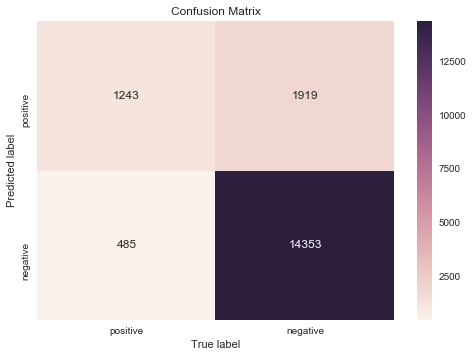

In [60]:
# Code for drawing seaborn heatmaps
class_names = ['positive','negative']
heatmap_dataframe = pd.DataFrame(confusion_matrix(test_data_labels.values, predictions), index=class_names, columns=class_names )
heatmap = sns.heatmap(heatmap_dataframe, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()

The AUC value for test data is 0.8839268442420818


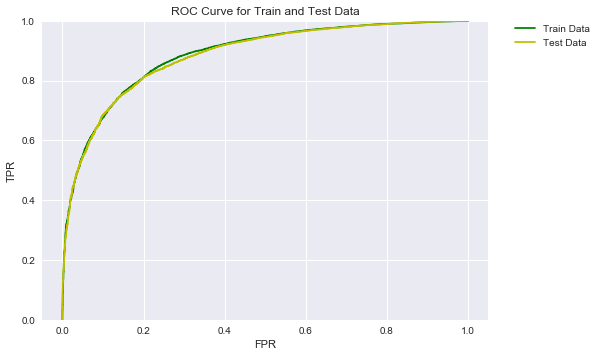

In [61]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
#https://medium.com/greyatom/lets-learn-about-auc-roc-curve-4a94b4d88152
#AUC and ROC Values

fpr_train, tpr_train, threshold_train = roc_curve(train_data_labels, prediction_probability_train [:,1],pos_label='positive')
fpr_test, tpr_test, threshold_test = roc_curve(test_data_labels, prediction_probability_test[:,1],pos_label='positive')
print(f"The AUC value for test data is {roc_auc_score(test_data_labels, prediction_probability_test[:,1])}")

plt.plot(fpr_train, tpr_train,'g', label = 'Train Data')
plt.plot(fpr_test, tpr_test,'y', label = 'Test Data')
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.title("ROC Curve for Train and Test Data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### [5.1.4]  Applying Linear SVM on TFIDF W2V,<font color='red'> SET 4</font>

In [62]:
#I am using tfidf_train and test which is already done in previous steps and also using Only Word2Vec from previous one
dictionary = dict(zip(tf_idf_vectorizer.get_feature_names(), list(tf_idf_vectorizer.idf_)))
tfidf_features = tf_idf_vectorizer.get_feature_names()
tfidf_sent_train = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentences_train): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_features:
            vec = w2v_model.wv[word]
            #  tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_train.append(sent_vec)
    row += 1

100%|███████████████████████████████████████████████████████████████████████████| 32000/32000 [02:23<00:00, 222.59it/s]


In [63]:
#test-data (for test data)
dictionary = dict(zip(tf_idf_vectorizer.get_feature_names(), list(tf_idf_vectorizer.idf_)))
tfidf_features = tf_idf_vectorizer.get_feature_names()
tfidf_sent_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentences_test): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_features:
            vec = w2v_model.wv[word]
            #  tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_test.append(sent_vec)
    row += 1

100%|███████████████████████████████████████████████████████████████████████████| 18000/18000 [01:32<00:00, 195.44it/s]


In [64]:
# Data-preprocessing: Standardizing the data , We can even proceed without standardizing but if we standardize our data then whole values will be in same range.So, we are doing it
from sklearn.preprocessing import StandardScaler
standardization = StandardScaler()
tfidf_sent_train_standardized =standardization.fit_transform(tfidf_sent_train)
tfidf_sent_test_standardized = standardization.transform(tfidf_sent_test)

In [65]:
tuned_parameters = [{'alpha': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

#using GridSearchCV
model = GridSearchCV(SGDClassifier(loss="hinge"),tuned_parameters,scoring='roc_auc',cv=3)
model.fit(tfidf_sent_train_standardized,train_data_labels.values)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.0001, 0.01, 1, 100, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [66]:
model.best_estimator_

SGDClassifier(alpha=1, average=False, class_weight=None, early_stopping=False,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [67]:
linear_svm_model = SGDClassifier(alpha=1, loss='hinge')

In [68]:
calibrated_model = CalibratedClassifierCV(base_estimator=linear_svm_model, cv=3)
calibrated_model.fit(tfidf_sent_train_standardized,train_data_labels)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1, average=False, class_weight=None, early_stopping=False,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
            cv=3, method='sigmoid')

In [69]:
probabilities = calibrated_model.predict_proba(tfidf_sent_test_standardized)
probabilitiess = probabilities[:,1]

In [70]:
predictions = calibrated_model.predict(tfidf_sent_test_standardized)
prediction_probability_test = calibrated_model.predict_proba(tfidf_sent_test_standardized)
prediction_probability_train = calibrated_model.predict_proba(tfidf_sent_train_standardized)

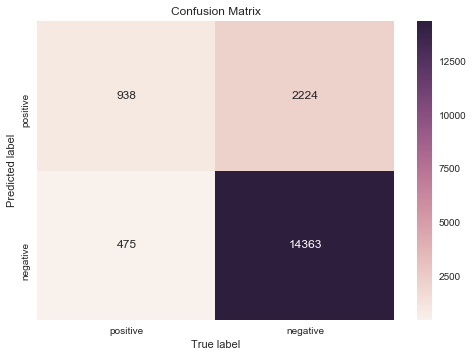

In [71]:
# Code for drawing seaborn heatmaps
class_names = ['positive','negative']
heatmap_dataframe = pd.DataFrame(confusion_matrix(test_data_labels.values, predictions), index=class_names, columns=class_names )
heatmap = sns.heatmap(heatmap_dataframe, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()

The AUC value for test data is 0.851235127272498


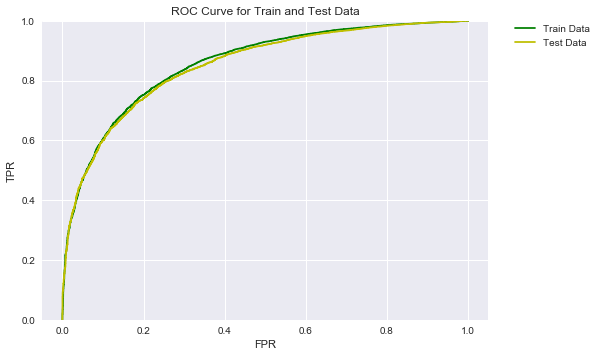

In [72]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
#https://medium.com/greyatom/lets-learn-about-auc-roc-curve-4a94b4d88152
#AUC and ROC Values

fpr_train, tpr_train, threshold_train = roc_curve(train_data_labels, prediction_probability_train [:,1],pos_label='positive')
fpr_test, tpr_test, threshold_test = roc_curve(test_data_labels, prediction_probability_test[:,1],pos_label='positive')
print(f"The AUC value for test data is {roc_auc_score(test_data_labels, prediction_probability_test[:,1])}")

plt.plot(fpr_train, tpr_train,'g', label = 'Train Data')
plt.plot(fpr_test, tpr_test,'y', label = 'Test Data')
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.title("ROC Curve for Train and Test Data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

## [5.2] RBF SVM

Let's consider only 20000 points because of computation among this 12000 will be for train data and 8000 will be of test data'

In [78]:
final_data_limited = final_data.sample(20000)

In [79]:
#sorting the dataset according to time as we need time-based splitting
final_data_limited = final_data_limited.sort_values(by ='Time',axis=0,ascending=True,inplace=False,kind='quicksort')

In [80]:
#dividing data into train and test
train_data = final_data_limited['Cleaned_text'][:12000]
test_data = final_data_limited['Cleaned_text'][12000:]
train_data_labels = final_data_limited['Score'][:12000]
test_data_labels = final_data_limited['Score'][12000:]


### [5.2.1] Applying RBF SVM on BOW,<font color='red'> SET 1</font>

In [81]:
#Initially applying BOW on train data and then will apply BOW on test data
#BoW on train data
count_vect = CountVectorizer(min_df=50,max_features=250) #selecting terms which has frequency higher than 50
bow_train_data = count_vect.fit_transform(train_data)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)
print("the type of count vectorizer ",type(bow_train_data))
print("the shape of out text BOW vectorizer ",bow_train_data.get_shape())
print("the number of unique words ", bow_train_data.get_shape()[1])

some feature names  ['abl', 'actual', 'ad', 'add', 'almost', 'also', 'alway', 'amazon', 'amount', 'anoth']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (12000, 250)
the number of unique words  250


In [84]:
tuned_parameters = [{'gamma': [10**-4, 10**-2, 10**0, 10**2, 10**4],'C':[10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3 ]}] 

#using RandomizedSearchCV  (instead of GridSearchCV we opt for RandomSearch CV because GridSearch takes time more when compared to RandomSearch cv)
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

model = GridSearchCV(SVC(kernel='rbf'),tuned_parameters,scoring='roc_auc',cv=2)
model.fit(bow_train_data,train_data_labels.values)


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'gamma': [0.0001, 0.01, 1, 100, 10000], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [85]:
model.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [86]:
svm_model = SVC(gamma=0.01,C=10,kernel='rbf')

In [87]:
calibrated_model = CalibratedClassifierCV(base_estimator=svm_model, cv=3)
calibrated_model.fit(bow_train_data,train_data_labels)

CalibratedClassifierCV(base_estimator=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
            cv=3, method='sigmoid')

In [89]:
#https://stackoverflow.com/questions/38692520/what-is-the-difference-between-fit-transform-and-transform-in-sklearn-countvecto
bow_test_data = count_vect.transform(test_data)

In [90]:
probabilities = calibrated_model.predict_proba(bow_test_data)
probabilitiess = probabilities[:,1]


In [91]:
predictions = calibrated_model.predict(bow_test_data)
prediction_probability_test = calibrated_model.predict_proba(bow_test_data)
prediction_probability_train = calibrated_model.predict_proba(bow_train_data)

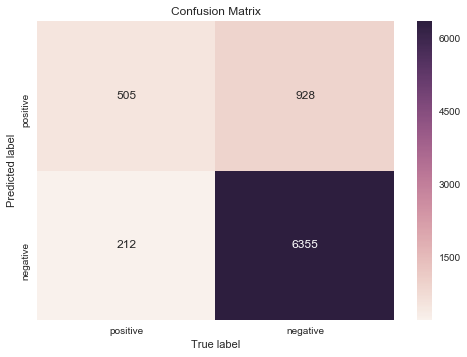

In [92]:
# Code for drawing seaborn heatmaps
class_names = ['positive','negative']
heatmap_dataframe = pd.DataFrame(confusion_matrix(test_data_labels.values, predictions), index=class_names, columns=class_names )
heatmap = sns.heatmap(heatmap_dataframe, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()


The AUC value for test data is 0.8707494205149964


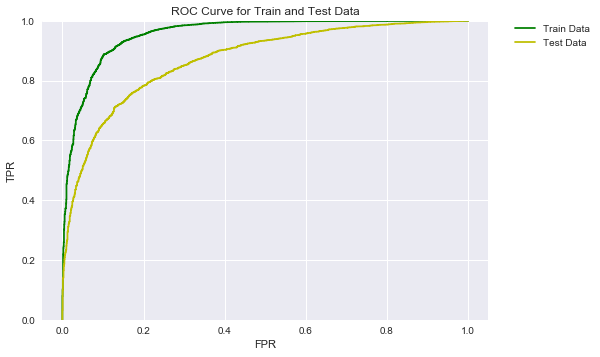

In [93]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
#https://medium.com/greyatom/lets-learn-about-auc-roc-curve-4a94b4d88152
#AUC and ROC Values

fpr_train, tpr_train, threshold_train = roc_curve(train_data_labels, prediction_probability_train [:,1],pos_label='positive')
fpr_test, tpr_test, threshold_test = roc_curve(test_data_labels, prediction_probability_test[:,1],pos_label='positive')
print(f"The AUC value for test data is {roc_auc_score(test_data_labels, prediction_probability_test[:,1])}")

plt.plot(fpr_train, tpr_train,'g', label = 'Train Data')
plt.plot(fpr_test, tpr_test,'y', label = 'Test Data')
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.title("ROC Curve for Train and Test Data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### [5.2.2] Applying RBF SVM on TFIDF,<font color='red'> SET 2</font>

In [94]:
tf_idf_vectorizer = TfidfVectorizer(ngram_range=(1,2),min_df=50,max_features=250)
tf_idf_train_data = tf_idf_vectorizer.fit_transform(train_data)
print("some sample features(unique words in the corpus)",tf_idf_vectorizer.get_feature_names()[0:10])
print('='*50)
print("the type of count vectorizer ",type(tf_idf_train_data))
print("the shape of out text TFIDF vectorizer ",tf_idf_train_data.get_shape())
print("the number of unique words including both unigrams and bigrams ", tf_idf_train_data.get_shape()[1])



some sample features(unique words in the corpus) ['actual', 'ad', 'add', 'almost', 'also', 'alway', 'amazon', 'amount', 'anoth', 'anyth']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (12000, 250)
the number of unique words including both unigrams and bigrams  250


In [95]:
tuned_parameters = [{'gamma': [10**-4, 10**-2, 10**0, 10**2, 10**4],'C':[10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3 ]}] 

#using RandomizedSearchCV  (instead of GridSearchCV we opt for RandomSearch CV because GridSearch takes time more when compared to RandomSearch cv)
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

model = GridSearchCV(SVC(kernel='rbf'),tuned_parameters,scoring='roc_auc',cv=2)
model.fit(tf_idf_train_data,train_data_labels.values)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'gamma': [0.0001, 0.01, 1, 100, 10000], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [96]:
model.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [97]:
svm_model = SVC(gamma=1,C=1,kernel='rbf')

In [98]:
calibrated_model = CalibratedClassifierCV(base_estimator=svm_model, cv=3)
calibrated_model.fit(tf_idf_train_data,train_data_labels)

CalibratedClassifierCV(base_estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
            cv=3, method='sigmoid')

In [100]:
tf_idf_test_data = tf_idf_vectorizer.transform(test_data)

In [101]:
probabilities = calibrated_model.predict_proba(tf_idf_test_data)
probabilitiess = probabilities[:,1]


In [102]:
predictions = calibrated_model.predict(tf_idf_test_data)
prediction_probability_test = calibrated_model.predict_proba(tf_idf_test_data)
prediction_probability_train = calibrated_model.predict_proba(tf_idf_train_data)

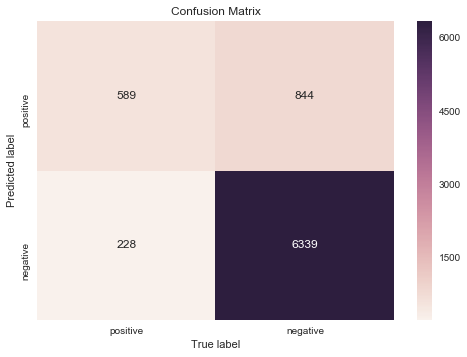

In [103]:
# Code for drawing seaborn heatmaps
class_names = ['positive','negative']
heatmap_dataframe = pd.DataFrame(confusion_matrix(test_data_labels.values, predictions), index=class_names, columns=class_names )
heatmap = sns.heatmap(heatmap_dataframe, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()


The AUC value for test data is 0.8787015922939785


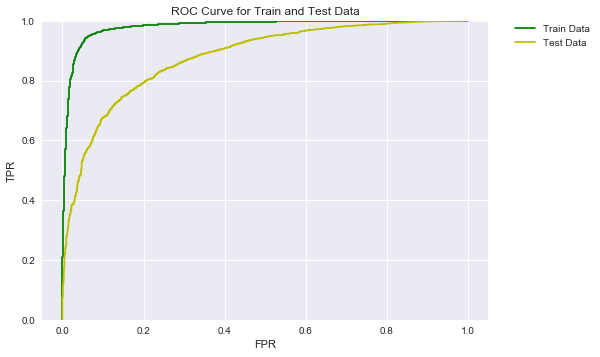

In [104]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
#https://medium.com/greyatom/lets-learn-about-auc-roc-curve-4a94b4d88152
#AUC and ROC Values

fpr_train, tpr_train, threshold_train = roc_curve(train_data_labels, prediction_probability_train [:,1],pos_label='positive')
fpr_test, tpr_test, threshold_test = roc_curve(test_data_labels, prediction_probability_test[:,1],pos_label='positive')
print(f"The AUC value for test data is {roc_auc_score(test_data_labels, prediction_probability_test[:,1])}")

plt.plot(fpr_train, tpr_train,'g', label = 'Train Data')
plt.plot(fpr_test, tpr_test,'y', label = 'Test Data')
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.title("ROC Curve for Train and Test Data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### [5.2.3]  Applying RBF SVM on AVG W2V,<font color='red'> SET 3</font>

In [105]:
# Train your own Word2Vec model using your own text corpus with train_data
list_of_sentences_train=[]
for sentance in train_data:
    list_of_sentences_train.append(sentance.split())

#training W2V using test data
list_of_sentences_test=[]
for sentance in test_data:
    list_of_sentences_test.append(sentance.split())

In [106]:
# Train your own Word2Vec model using your own text corpus with train_data with min_count = 5
w2v_model=Word2Vec(list_of_sentences_train,min_count=5,size=50, workers=4)

w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))

number of words that occured minimum 5 times  4993


In [107]:
#computing avgW2V for train data (for each review)
train_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentences_train): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    train_vectors.append(sent_vec)



100%|███████████████████████████████████████████████████████████████████████████| 12000/12000 [00:15<00:00, 753.92it/s]


In [108]:
#computing avgW2V for train data (for each review)
test_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentences_test): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    test_vectors.append(sent_vec)



100%|█████████████████████████████████████████████████████████████████████████████| 8000/8000 [00:12<00:00, 645.74it/s]


In [109]:
# Data-preprocessing: Standardizing the data , We can even proceed without standardizing but if we standardize our data then whole values will be in same range.So, we are doing it
from sklearn.preprocessing import StandardScaler
standardization = StandardScaler()
train_vector_standardized =standardization.fit_transform(train_vectors)
test_vector_standardized = standardization.transform(test_vectors)


In [110]:
train_vector_standardized.shape

(12000, 50)

In [112]:
test_vector_standardized.shape

(8000, 50)

In [114]:
tuned_parameters = [{'gamma': [10**-4, 10**-2, 10**0, 10**2, 10**4],'C':[10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3 ]}] 

#using RandomizedSearchCV  (instead of GridSearchCV we opt for RandomSearch CV because GridSearch takes time more when compared to RandomSearch cv)
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

model = GridSearchCV(SVC(kernel='rbf'),tuned_parameters,scoring='roc_auc',cv=2)
model.fit(train_vector_standardized,train_data_labels.values)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'gamma': [0.0001, 0.01, 1, 100, 10000], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [115]:
model.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [127]:
svm_model = SVC(gamma=0.0001,C=1000,kernel='rbf')

In [128]:
calibrated_model = CalibratedClassifierCV(base_estimator=svm_model, cv=3)
calibrated_model.fit(train_vector_standardized,train_data_labels)

CalibratedClassifierCV(base_estimator=SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
            cv=3, method='sigmoid')

In [129]:
probabilities = calibrated_model.predict_proba(test_vector_standardized)
probabilitiess = probabilities[:,1]

In [130]:
predictions = calibrated_model.predict(test_vector_standardized)
prediction_probability_test = calibrated_model.predict_proba(test_vector_standardized)
prediction_probability_train = calibrated_model.predict_proba(train_vector_standardized)


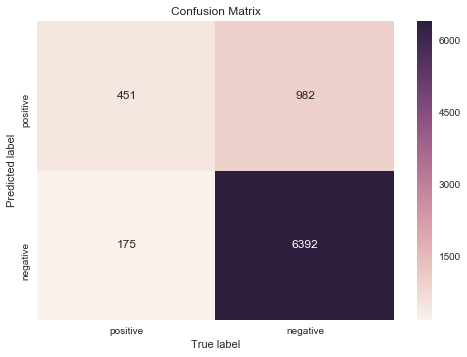

In [131]:
# Code for drawing seaborn heatmaps
class_names = ['positive','negative']
heatmap_dataframe = pd.DataFrame(confusion_matrix(test_data_labels.values, predictions), index=class_names, columns=class_names )
heatmap = sns.heatmap(heatmap_dataframe, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()


The AUC value for test data is 0.8705023563545061


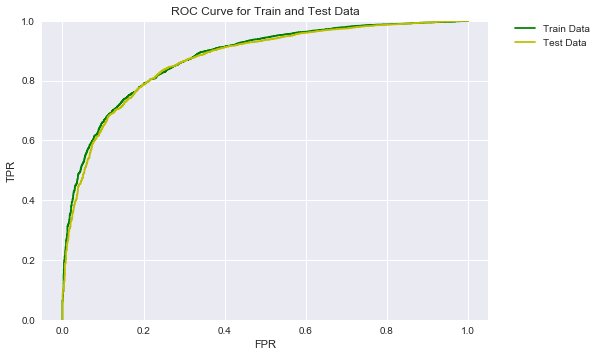

In [132]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
#https://medium.com/greyatom/lets-learn-about-auc-roc-curve-4a94b4d88152
#AUC and ROC Values

fpr_train, tpr_train, threshold_train = roc_curve(train_data_labels, prediction_probability_train [:,1],pos_label='positive')
fpr_test, tpr_test, threshold_test = roc_curve(test_data_labels, prediction_probability_test[:,1],pos_label='positive')
print(f"The AUC value for test data is {roc_auc_score(test_data_labels, prediction_probability_test[:,1])}")

plt.plot(fpr_train, tpr_train,'g', label = 'Train Data')
plt.plot(fpr_test, tpr_test,'y', label = 'Test Data')
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.title("ROC Curve for Train and Test Data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### [5.2.4]  Applying RBF SVM on TFIDF W2V,<font color='red'> SET 4</font>

In [122]:
#I am using tfidf_train and test which is already done in previous steps and also using Only Word2Vec from previous one
dictionary = dict(zip(tf_idf_vectorizer.get_feature_names(), list(tf_idf_vectorizer.idf_)))
tfidf_features = tf_idf_vectorizer.get_feature_names()
tfidf_sent_train = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentences_train): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_features:
            vec = w2v_model.wv[word]
            #  tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_train.append(sent_vec)
    row += 1

100%|███████████████████████████████████████████████████████████████████████████| 12000/12000 [00:18<00:00, 639.31it/s]


In [123]:
#test-data (for test data)
dictionary = dict(zip(tf_idf_vectorizer.get_feature_names(), list(tf_idf_vectorizer.idf_)))
tfidf_features = tf_idf_vectorizer.get_feature_names()
tfidf_sent_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentences_test): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_features:
            vec = w2v_model.wv[word]
            #  tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_test.append(sent_vec)
    row += 1


100%|█████████████████████████████████████████████████████████████████████████████| 8000/8000 [00:13<00:00, 612.02it/s]


In [124]:
# Data-preprocessing: Standardizing the data , We can even proceed without standardizing but if we standardize our data then whole values will be in same range.So, we are doing it
from sklearn.preprocessing import StandardScaler
standardization = StandardScaler()
tfidf_sent_train_standardized =standardization.fit_transform(tfidf_sent_train)
tfidf_sent_test_standardized = standardization.transform(tfidf_sent_test)

In [125]:
tfidf_sent_train_standardized.shape

(12000, 50)

In [126]:
tfidf_sent_test_standardized.shape

(8000, 50)

In [133]:
tuned_parameters = [{'gamma': [10**-4, 10**-2, 10**0, 10**2, 10**4],'C':[10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3 ]}] 

#using RandomizedSearchCV  (instead of GridSearchCV we opt for RandomSearch CV because GridSearch takes time more when compared to RandomSearch cv)
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

model = GridSearchCV(SVC(kernel='rbf'),tuned_parameters,scoring='roc_auc',cv=2)
model.fit(tfidf_sent_train_standardized,train_data_labels.values)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'gamma': [0.0001, 0.01, 1, 100, 10000], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [134]:
model.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [135]:
svm_model = SVC(gamma=0.0001,C=1000,kernel='rbf')

In [136]:
calibrated_model = CalibratedClassifierCV(base_estimator=svm_model, cv=3)
calibrated_model.fit(tfidf_sent_train_standardized,train_data_labels)

CalibratedClassifierCV(base_estimator=SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
            cv=3, method='sigmoid')

In [137]:
probabilities = calibrated_model.predict_proba(tfidf_sent_test_standardized)
probabilitiess = probabilities[:,1]

In [138]:
predictions = calibrated_model.predict(tfidf_sent_test_standardized)
prediction_probability_test = calibrated_model.predict_proba(tfidf_sent_test_standardized)
prediction_probability_train = calibrated_model.predict_proba(tfidf_sent_train_standardized)

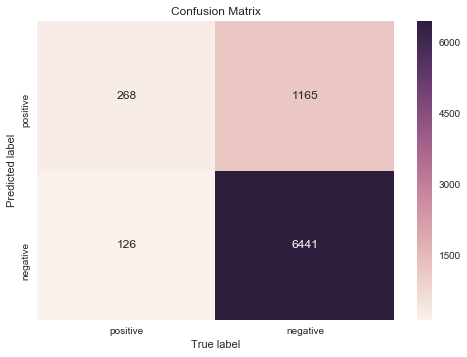

In [139]:
# Code for drawing seaborn heatmaps
class_names = ['positive','negative']
heatmap_dataframe = pd.DataFrame(confusion_matrix(test_data_labels.values, predictions), index=class_names, columns=class_names )
heatmap = sns.heatmap(heatmap_dataframe, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()


The AUC value for test data is 0.8255128759745353


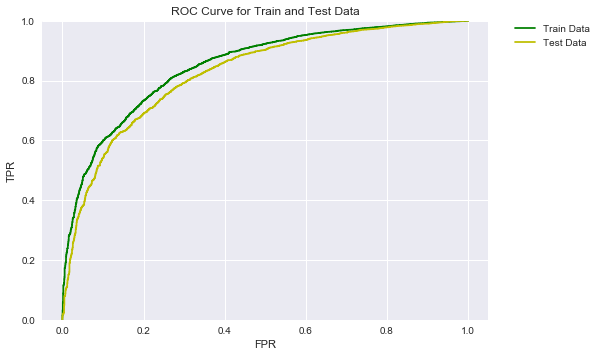

In [140]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
#https://medium.com/greyatom/lets-learn-about-auc-roc-curve-4a94b4d88152
#AUC and ROC Values

fpr_train, tpr_train, threshold_train = roc_curve(train_data_labels, prediction_probability_train [:,1],pos_label='positive')
fpr_test, tpr_test, threshold_test = roc_curve(test_data_labels, prediction_probability_test[:,1],pos_label='positive')
print(f"The AUC value for test data is {roc_auc_score(test_data_labels, prediction_probability_test[:,1])}")

plt.plot(fpr_train, tpr_train,'g', label = 'Train Data')
plt.plot(fpr_test, tpr_test,'y', label = 'Test Data')
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.title("ROC Curve for Train and Test Data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# [6] Conclusions

1. Among all the NLP techniques, we have obtained good accuracy with tf-idf model

2. Worst performed model out of all is Tf-idf Weighted Word2Vec (RBF kernel). That might be because we have taken very small amount of subset and trained only on it and tried to get predictions on unseen data based on trained weights

3. Important features for positive reviews are , i.e., when it has these words then they are predicted as POSITIVE review ['great' 'best' 'love' 'delici' 'good' 'excel' 'perfect' 'nice' 'favorit'
 'wonder']

4. Similarly, When it has negative reviews , important features which obtained are {'stale' 'wast' 'money' 'unfortun' 'horribl' 'return' 'aw' 'terribl'
 'worst' 'disappoint'}

5. We can see that ROC-AUC scores for RBF kernel are on lower side. Actually RBF kernel can perform well on non-linearly seperable data whereas linear SVM works fine on linearly seperable data.

6. By looking at the results , we can say that our data is almost linearly seperable. On the Other hand, we can compare both the SVM types if we would have trained and tested both types on same datasets. But, we have opted for different number of datapoints for each because of computational resources. 


-----> Even though we haven't tested using cross-validation dataset, By observing test and train accuracies we can co-relate whether our model is good or is it tending to overfit/underfit.

-----> Here, in only R.B.F kernel SVM's, we can see such phenomena. As discussed above there might be multiple reasons for it (as it is trained only on few datapoints and data might be linearly seperable where RBF kernel's might fail)

-----> Among all, we have got high roc-auc on Tf-idf model. So, we would say, it is best among others.

In [144]:
from prettytable import PrettyTable
# reference : http://zetcode.com/python/prettytable/
pretty_table = PrettyTable()
pretty_table.field_names = ["vectorizer_type","SVM Type","Hyperparameter(alpha)","roc-auc"]
pretty_table.add_row(["Bag of words","Linear-SVM","0.01","0.91"])
pretty_table.add_row(["TF-IDF","Linear-SVM","0.01","0.93"])
pretty_table.add_row(["AvgW2V","Linear-SVM","0.01","0.88"])
pretty_table.add_row(["Tf_idfW2V","Linear-SVM","1","0.85"])
print(pretty_table)

pretty_table = PrettyTable()
pretty_table.field_names = ["vectorizer_type","SVM Type","Hyperparameter(gamma)","Hyperparameter(C)","roc-auc"]
pretty_table.add_row(["Bag of words","RBF Kernel SVM","0.01","10","0.91"])
pretty_table.add_row(["TF-IDF","RBF Kernel SVM","1","1","0.87"])
pretty_table.add_row(["AvgW2V","RBF Kernel SVM","0.0001","1000","0.87"])
pretty_table.add_row(["Tf_idfW2V","RBF Kernel SVM","0.0001","1000","0.82"])
print(pretty_table)

+-----------------+------------+-----------------------+---------+
| vectorizer_type |  SVM Type  | Hyperparameter(alpha) | roc-auc |
+-----------------+------------+-----------------------+---------+
|   Bag of words  | Linear-SVM |          0.01         |   0.91  |
|      TF-IDF     | Linear-SVM |          0.01         |   0.93  |
|      AvgW2V     | Linear-SVM |          0.01         |   0.88  |
|    Tf_idfW2V    | Linear-SVM |           1           |   0.85  |
+-----------------+------------+-----------------------+---------+
+-----------------+----------------+-----------------------+-------------------+---------+
| vectorizer_type |    SVM Type    | Hyperparameter(gamma) | Hyperparameter(C) | roc-auc |
+-----------------+----------------+-----------------------+-------------------+---------+
|   Bag of words  | RBF Kernel SVM |          0.01         |         10        |   0.91  |
|      TF-IDF     | RBF Kernel SVM |           1           |         1         |   0.87  |
|      Av